## Nico Knünz

# Dynamic Programming Exercises

**NOTICE:**
1. You are allowed to work in groups of up to three people but **have to document** your group's\
 members in the top cell of your notebook.
2. **Comment your code**, explain what you do (refer to the slides). It will help you understand the topics\
 and help me understand your thinking progress. Quality of comments will be graded.
3. **Discuss** and analyze your results, **write-down your learnings**. These exercises are no programming\
 exercises it is about learning and getting a touch for these methods. Such questions might be asked in the\
 final exams.
 4. Feel free to **experiment** with these methods. Change parameters think about improvements, write down\
 what you learned. This is not only about collecting points for the final grade, it is about understanding\
  the methods.

### Exercise 1 - Manual Policy Evaluation

**Summary:**
In this exercise you will manually calculate the state-value function for a very simple system.\
This will help you understand value-state functions and the algorithms we will use later to estimate such\
functions.

**Provided Code:** No code is provided.


**The Problem:**

See the slides of the lecture for a visual explanation.

* We consider an environment with three states (S0, S1, S2) and two actions (left, right).
* Each action transitions between states in sequence: S0 <-> S1 <-> S2.
* The reward for entering a state is: S0 = 1, S1 = -1, S2 = 1.
* We follow  the policy:\
$\pi(\text{left} | \text{S0}) = 0$\
$\pi(\text{right} | \text{S0}) = 1$\
$\pi(\text{left} | \text{S1}) = 0.5$\
$\pi(\text{right} | \text{S1}) = 0.5$\
$\pi(\text{left} | \text{S2}) = 1$\
$\pi(\text{right} | \text{S2}) = 0$
* Each transition is deterministic, this means if we take action **left** in state **S1**, \
the probability of ending up in **S0** is 1 while the probability of ending up in **S2** is 0.
* Rewards are deterministic, this means if we reach state **S0** we will receive a reward\
of 1 with probability of 1 and a reward of -1 with a probability of 0.




**Your Tasks in this exercise:**

1. Calculate (by hand) the state-value function of the given system under policy $\pi$:
    * For each state write down the formula from the slides (only consider terms with nonzero probability).
    * Solve the resulting System of Linear Equations (hint: $v_\pi(S0), v_\pi(S1), v_\pi(S2)$ are your variables).
    * Treat $\gamma$ as a constant unknown value (it's a hyperparameter).
    


2. Answer and Discuss:
    * What is the value of each state under $\gamma = 0.9$ ?
    * What happens if we pick $\gamma = 0.99$? Interpret the values.
    * What happens if we pick $\gamma = 0$? Interpret the values.
    * Explain what the value of a state tells us.

Post your solution and answers here.

# Solution

## 1. Calculate

For the convenience of writing here, let v0 = v under pi (S0), v1 = v under pi (S1), v2 = v under pi (S2)

We got the formulas =

v0 = -1 + γ * v1\
\
v1 = 0.5 * (1 + γ * v0) + 0.5 * (1 + γ * v2) // we have a 50/50 change of taking action left or right\
v1 = 0.5 + 0.5γv0 + 0.5 + 0.5γv2\
v1 = 1 + (γ/2) * (v0 + v2)

v2 = -1 + γ * v1

Lets solve the linear equation. v0 = v2\
Substitute the v0 into v1.

v1 = 1 + (γ/2) * ((-1 + γ * v1) + (-1 + γ * v1))\
v1 = 1 + (-0.5γ) + 0.5 * γ^2 * v1 + (-0.5γ) + 0.5 * γ^2 * v1\
v1 = 1 -γ + γ^2 * v1

v1 - γ^2 * v1 = 1 - γ\
v1 * (1 - γ^2) = 1 - γ // divide by (1 - γ^2)\
v1 = (1 - γ) / (1 - γ^2) = 1 / (1 + γ)

v0 = v2 = -1 + γ * v1\
v0 = v2 = -1 + γ / (1 + γ)\
v0 = v2 = -1 + γ / (1 + γ)\
v0 = v2 = -(1 + γ) / (1 + γ) + γ / (1 + γ) // we can count together the fractions\
v0 = v2 = (-1 - γ + γ) / (1 + γ)\
v0 = v2 = -1 / (1 + γ)

## 2. Answer and discuss

With γ = 0.9

v0 = v2 = -1 / (1 + 0.9) = -0.52631578.....
v1 = 1 / (1 + 0.9) = 0.52631578.....

With γ = 0.99

v0 = v2 = -0.5025125628.....
v1 = 0.5025125628.....

The values did move closer to zero in both cases. We are giving future values more weight, so the reward for bouncing between reward of -1 and 1 is average out.


With γ = 0

v0 = v2 = -1.
v1 = 1

In this example, we do not care about future rewards at all. Only the immediate reward is taken into account.


What the value of state tells us:

The value of a state basically tells us the expected total (discounted) reward you will receive starting from that state and following the policy pi forever.\ High value of a state = things are going good starting from here and following pi\
Low value of a state = things are going bad starting from here and following pi

### Exercise 2 - Iterative Policy Evaluation

**Summary:**


**Provided Code:** Use the ``Environment`` class and ``policy`` function provided below.



**Your Tasks in this exercise:**

1. Implement the *Iterative Policy Evaluation* algorithm.
    * Use the ``Environment`` class and ``policy`` function which are provided.
2. Estimate the state-value function
    * Experiment with different values for $\theta$
    * Discuss and compare your estimates to your results achieved by exact calculation in the previous exercise.

In [19]:
#@title **Provided Code:** ``Environment`` class and ``policy`` Function.
class Environment:

    def state_space(self):
        return [0,1,2]

    def non_terminal_state_space(self):
        return [0,1,2]

    def action_space(self):
        return ['left', 'right']

    def reward_space(self):
        return [-1, 1]

    def p(self, s_prime, r, s, a):
        ''' System dynamics of the toy world. This is all we need to evaluate the policy (i.e. estimate the state-value function).
            Usually we do not have this but we have a "simulated" environment instead.
        '''
        if s == 0:
            # If we are in state S0, the only way to have all probabilities != 0 is a right move
            # with a reward of -1 and a resulting state of S1
            #
            if a == 'right' and s_prime == 1 and r == -1:
                return 1
            else:
                return 0

        if s == 2:
            # If we are in state S2, the only way to have all probabilities != 0 is a left move
            # with a reward of -1 and a resulting state of S1
            #
            if a == 'left' and s_prime == 1 and r == -1:
                return 1
            else:
                return 0

        if s == 1:
            # If we are in S1 we can either move left to S0 with a reward of 1
            # or right to S2 with a reward of 1
            if a =='left' and s_prime == 0 and r == 1:
                return 1
            if a == 'right' and s_prime == 2 and r == 1:
                return 1
            else:
                return 0

def policy(a, s):
    '''This function implements the policy (i.e.: for a given state s, it
    returns the probability of taking action a).
    '''
    if s == 0:
        if a == 'right':
            return 1
        else:
            return 0

    if s == 1:
        # both actions have equal prob. in S1
        return 0.5

    if s == 2:
        if a == 'left':
            return 1
        else:
            return 0

    raise Exception('Unexpected action, state tuple: (%s, %d)' % (a, s))


In [17]:
def iterative_policy_evaluation(env, policy, gamma, theta):
    # initialize V for every state with 0
    V = {s: 0.0 for s in env.state_space()}

    while True:
        delta = 0

        # looping over all s of S
        for s in env.state_space():
            v_old = V[s]
            v_new = 0.0

            # loop over all actions
            for a in env.action_space():
                # get the probability for the current a given that we are currently in s
                pi_sa = policy(a, s)

                # we do not need to calculate further if action has prob = 0
                if pi_sa == 0:
                    continue

                # iterate over all s_next and rewards possible
                for s_next in env.state_space():
                    for r in env.reward_space():
                        # get probabilty for getting into s_next and receiving p from dynamic function
                        p = env.p(s_next, r, s, a)
                        # we just care about if probabilty is greater then 0
                        if p > 0:
                            # calculate next V(s)
                            v_new += pi_sa * p * (r + gamma * V[s_next])

            V[s] = v_new
            # calculate change of V(s) and set it as new maximum delta if it is
            delta = max(delta, abs(v_old - V[s]))

        # check if delta is under threshold to break out
        if delta < theta:
            break

    return V

In [18]:
env = Environment()

# high theta
V = iterative_policy_evaluation(env, policy, 0.9, 100)
print(V)
print("With a very high theta, the algorithm can take enough runs to get even close to estimates")

# mid theta
V = iterative_policy_evaluation(env, policy, 0.9, 1)
print(V)
print("\nWith a very mid theta, the algorithm can get toward the estimates from our calculations, but there is still accuracy missing")

# low theta
V = iterative_policy_evaluation(env, policy, 0.9, 1e-10)
print(V)
print("\nWith a very low theta, the algorithm gets pretty accurate. Also the values for S0 and S2 are pretty close to each other, with S2 also being the close * -1")

print("We can say that theta is controlling our accuracy.")

diff_v0 = abs(-0.52631578 - V[0])
diff_v1 = abs(0.52631578 - V[1])
diff_v2 = abs(-0.52631578 - V[2])
print("\nFor gamma = 0.9 we calculated = (-)0.52631578..... Differences are for v0, v1, v2 are =")
print(diff_v0)
print (diff_v1)
print(diff_v2)

print("\nWhat about gamma = 0.99 or 0?")
print(f"Diff for V0 at gamma = 0.99 = {abs(-0.5025125628 - iterative_policy_evaluation(env, policy, 0.99, 1e-10)[0])}")
print(f"Diff for V1 at gamma = 0.99 = {abs(0.5025125628 - iterative_policy_evaluation(env, policy, 0.99, 1e-10)[1])}")
print(f"Diff for V2 at gamma = 0.99 = {abs(-0.5025125628 - iterative_policy_evaluation(env, policy, 0.99, 1e-10)[2])}")

print(f"\nDiff for V0 at gamma = 0 = {abs(-1 - iterative_policy_evaluation(env, policy, 0, 1e-10)[0])}")
print(f"Diff for V1 at gamma = 0 = {abs(1 - iterative_policy_evaluation(env, policy, 0, 1e-10)[1])}")
print(f"Diff for V2 at gamma = 0 = {abs(-1 - iterative_policy_evaluation(env, policy, 0, 1e-10)[2])}")

print("Values all are looking pretty close!")

{0: -1.0, 1: 0.55, 2: -0.5049999999999999}
With a very high theta, the algorithm can take enough runs to get even close to estimates
{0: -0.5049999999999999, 1: 0.5455000000000001, 2: -0.5090499999999999}

With a very mid theta, the algorithm can get toward the estimates from our calculations, but there is still accuracy missing
{0: -0.5263157891189295, 1: 0.5263157897929635, 2: -0.5263157891863328}

With a very low theta, the algorithm gets pretty accurate. Also the values for S0 and S2 are pretty close to each other, with S2 also being the close * -1
We can say that theta is controlling our accuracy.

For gamma = 0.9 we calculated = (-)0.52631578..... Differences are for v0, v1, v2 are =
9.118929500395723e-09
9.792963440169444e-09
9.186332805555253e-09

What about gamma = 0.99 or 0?
Diff for V0 at gamma = 0.99 = 4.894460059468031e-09
Diff for V1 at gamma = 0.99 = 4.87351536904157e-09
Diff for V2 at gamma = 0.99 = 4.796780306293158e-09

Diff for V0 at gamma = 0 = 0.0
Diff for V1 at ga

### Exercise 3 - Policy Iteration

**Summary:** In this exercise you will use policy iteration to find a policy that leads the little guy safely from\
itâ€™s start position to the goal. To do so we will use the FrozenLake-v1 environment provided by gymnasium which is\
a maintained fork of OpenAI's gym library.  


**Provided Code:** The ``FrozenLakeSystemDynamics`` class provides you with the required system transition probabilities\
needed by the algorithm (and all DP algorithms). It is not always possible to implement such a class. However in this\
example the system is easy enough to create such a model. Have a look at the class, useful functions will be
* ``p(s_prime, r, s, a)`` - transition probabilities
* ``nonterminal_state_space()`` - gives a list of nonterminal states
* ``state_space()`` - gives a list of all states
* ``action_space()`` - gives a list of actions
* ``reward_space()`` - gives a list of possible rewards

I also provide you with some helper functions to visualize and test your policies. The ``run_and_visualize_policy(env, pi, delay=0.175)``\
can be used to visualize the agent performing your policy. Use the ``test_policy(env, pi, iterations=500)`` function to evaluate\
the success rate of your policy over 500 iterations.



**Your Tasks in this exercise:**

1. Implement the *Policy Iteration* algorithm to find an optimal policy.
    * Use the ``FrozenLakeSystemDynamics`` object which will provide you with all information you need.
    * **Notice:** The given environment is always solvable even if ``is_slippery`` is set to ``True``.
    * **Hint:** During implementation it can be helpful to set ``is_slippery`` to ``False`` and use some smaller environments\
    (see https://gymnasium.farama.org/environments/toy_text/frozen_lake/#) for more information on how to do this.
    
2. Run and Evaluate your Policy
    * Use the ``run_and_visualize_policy`` as well as the ``test_policy`` functions to check the found policy.
    * Have a look at the state-value function estimation (V). Explain why the policy can always solve the specicif provided environment even if
    it is slippery.
    * Generate random environments (see the website on how to do this) and try to solve those. Is each environment solvable?
    


**Exercise 3 - Provided Code**

In [30]:
# If you run on google-colab you have to install this package whenever you start a kernel
!pip install gymnasium

In [34]:
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 9.5 MB/s  0:00:01m 9.5 MB/s eta 0:00:01


In [32]:
#@title **Provided Code:** ``FrozenLakeSystemDynamics`` class and ``run_and_visualize_policy``  and ``test_policy`` Function.
import numpy as np
import time
from IPython import display
import matplotlib.pyplot as plt

'''
I had to write this class so we can use the environment using a DP approach
(remember DP requires the p(s', r | s, a) function). This is usually not possible
for more complex environments, we thereofre have to resort to other (but similar)
methods for solving those.
'''
class FrozenLakeSystemDynamics:

    def __init__(self, env):
        assert env.spec.id == 'FrozenLake-v1', 'This class only supports the FrozenLake-v1 environment'

        # Map is always a square shape
        #
        self._n_rows = len(env.spec.kwargs['desc'])
        self._n_cols = len(env.spec.kwargs['desc'])
        self._parse_map_(env.spec.kwargs['desc'])
        if 'is_slippery' not in env.spec.kwargs:
            self._is_slippery = True # default true
        else:
            self._is_slippery = env.spec.kwargs['is_slippery']

    def _parse_map_(self, desc):
        # Map is always a square shape
        self._map = np.chararray((len(desc), len(desc)))
        self._nonterminal_states = []
        self._states = []


        for row_index, row_content in enumerate(desc):
            for col_index, content in enumerate(row_content):
                self._map[row_index, col_index] = content

                # Check if this is a terminal state
                #
                if content != 'G' and content != 'H':
                    self._nonterminal_states.append(self.sub2ind(row_index, col_index))

                self._states.append(self.sub2ind(row_index, col_index))

    def ind2sub(self, ind):
        # row, col
        return (ind // self._n_rows, ind % self._n_cols)

    def sub2ind(self, row, col):
        return self._n_cols * row + col

    def nonterminal_state_space(self):
        return self._nonterminal_states

    def state_space(self):
        return self._states

    def reward_space(self):
        return [0,1]

    def action_space(self):
        return [0,1,2,3]

    # 'left' : 0, 'right' : 2, 'down' : 1, 'up' : 3}
    def p(self, s_prime, reward, s, action):

        reward = int(reward)
        (r,c) = self.ind2sub(s)
        (r_p, c_p) = self.ind2sub(s_prime)

        # Compute possible outcomes
        #
        possible_s_prime = []

        if action == 0: # Left
            if c == 0: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r,c-1))

        if action == 2: # Right
            if c == self._n_cols - 1: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r,c+1))

        if action == 1: # Down
            if r == self._n_rows - 1: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r+1,c))

        if action == 3: # Up
            if r == 0: # agent is at the edge
                possible_s_prime.append(self.sub2ind(r,c)) # do not move
            else:
                possible_s_prime.append(self.sub2ind(r-1,c))


        # If it is slippery there is a 1/3 chance that we either move up or down
        # when taking action left or right.
        #
        if self._is_slippery and (action == 0 or action == 2):
            if r > 0:
                possible_s_prime.append(self.sub2ind(r-1, c)) # 1/3 chance to move up
            if r < self._n_rows-1:
                possible_s_prime.append(self.sub2ind(r+1 ,c)) # 1/3 chance to move down

            if r == 0 or r == self._n_rows-1:
                # if we are at an edge, there is a chance we will slip into the edge
                # which will result in no movement.
                possible_s_prime.append(self.sub2ind(r,c))


        # If it is slippery there is a 1/3 chance that we either move left or right
        # when taking action up or down.
        #
        if self._is_slippery and (action == 1 or action == 3):
            if c > 0:
                possible_s_prime.append(self.sub2ind(r, c-1)) # 1/3 chance to move up
            if c < self._n_cols-1:
                possible_s_prime.append(self.sub2ind(r ,c+1)) # 1/3 chance to move down

            if c == 0 or c == self._n_cols-1:
                # if we are at an edge, there is a chance we will slip into the edge
                # which will result in no movement.
                possible_s_prime.append(self.sub2ind(r,c))

        # If state is not reachable return 0 probability.
        #
        if s_prime not in possible_s_prime:
            return 0

        # Frozen lake returns either 0 or 1 reward.
        if reward not in [0,1]:
            return 0


        if s_prime in possible_s_prime:
            # If s_prime is the goal, we get reward 1.
            #
            if self._map[r_p, c_p] == b'G':
                if reward == 1:
                    # If slippery we could end up in other spots.
                    if self._is_slippery:
                        return 1.0 / 3
                    else:
                        return 1
                else:
                    return 0
            # If it is not the goal, we always get a reward of 0.
            if reward != 0:
                return 0
            else:
                if self._is_slippery:
                    return 1.0 / 3
                else:
                    return 1



def run_and_visualize_policy(env, pi, delay=0.175):
    '''
        Visualizes a policy.
        env - FrozenLake-v1 environment.
        pi - A policy (i.e. a numpy.ndarray such that pi[state] = action).
    '''
    s, _ = env.reset()
    plt.imshow(env.render())

    while True:
        a = int(pi[s])
        s,_,terminated,truncated,_ = env.step(a)
        plt.imshow(env.render())
        plt.show()
        display.clear_output(wait=True)
        time.sleep(delay)

        if terminated or truncated:
            break

def test_policy(env, pi, iterations=500):
    '''
        Tests a policy.
        env - FrozenLake-v1 environment.
        pi - A policy (i.e. a numpy.ndarray such that pi[state] = action).
    '''
    success_cnt = 0
    for it in range(iterations):
        s,_ = env.reset()
        while True:
            a = int(pi[s])
            s,reward,terminated,truncated,_ = env.step(a)

            if terminated == True or truncated == True:
                if int(reward) == 1:
                    success_cnt += 1
                break


    return 100 * (success_cnt / iterations)

/tmp/ipykernel_207730/3010976928.py:30: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  self._map = np.chararray((len(desc), len(desc)))


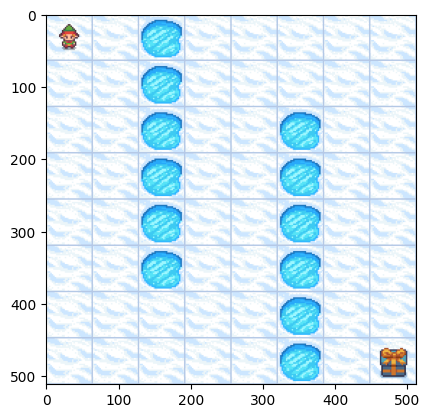

In [82]:
# This cell initializes the environment and the system dynamics object.
#
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

env_slippery= gym.make('FrozenLake-v1', desc=['SFHFFFFF', 'FFHFFFFF', 'FFHFFHFF', 'FFHFFHFF','FFHFFHFF','FFHFFHFF','FFFFFHFF','FFFFFHFG'], is_slippery=True, render_mode='rgb_array')
env_slippery._max_episode_steps = 2000
envDynamics_slippery = FrozenLakeSystemDynamics(env_slippery)

env_slippery.reset()
plt.imshow(env_slippery.render())

In [53]:
def policy_iteration(envDynamics, gamma, theta):
    S = envDynamics.state_space()
    A = envDynamics.action_space()
    R = envDynamics.reward_space()

    # initialize policy randomly and V to zero
    V = np.zeros(len(S))
    pi = np.random.choice(A, size=len(S))

    while True:
        # policy evaluation
        while True:
            delta = 0

            # looping over all non-terminal states
            for s in envDynamics.nonterminal_state_space():
                v_old = V[s]
                v_new = 0.0

                for s_next in S:
                    for r in R:
                        # get probabilty for getting into s_next and receiving p from dynamic function
                        p = envDynamics.p(s_next, r, s, pi[s])
                        # we just care about if probabilty is greater then 0
                        if p > 0:
                            # calculate next V(s)
                            v_new += p * (r + gamma * V[s_next])

                V[s] = v_new
                # calculate change of V(s) and set it as new maximum delta if it is
                delta = max(delta, abs(v_old - V[s]))

            # check if delta is under threshold to break out
            if delta < theta:
                break # if we break out, we continue to policy improvement

        # policy improvement
        policy_stable = True
        # looping over all non-terminal states
        for s in envDynamics.nonterminal_state_space():
            old_action = pi[s]

            # lets just calculate all action value and pick the best one
            action_values = []

            # iterate over all possible actions
            for a in A:
                # start with action value of 0
                q_sa = 0.0
                #loop over all possible next states and rewards
                for s_next in S:
                    for r in R:
                        # get probability for getting into s_next and receiving p from dynamic function
                        p = envDynamics.p(s_next, r, s, a)
                        # we just care about if probabilty is greater then 0
                        if p > 0:
                            q_sa += p * (r + gamma * V[s_next])
                # append action value to list
                action_values.append(q_sa)

            # pick the action with the highest action value
            pi[s] = A[int(np.argmax(action_values))]

            # check if policy changed
            if old_action != pi[s]:
                policy_stable = False # policy is not stable yet

        # if policy is stable we can stop and return pi else the top while loop continues
        if policy_stable:
            break

    return pi, V

In [86]:
optimized_pi, V = policy_iteration(envDynamics_slippery, 0.99, 1e-10)
print("Success rate:", test_policy(env_slippery, optimized_pi), "%")

Success rate: 100.0 %


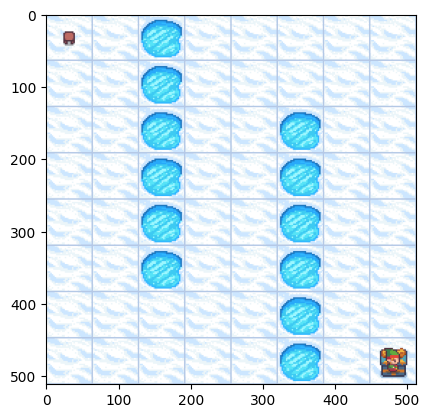

In [87]:
run_and_visualize_policy(env_slippery, optimized_pi)

In [65]:
print("How does the policy work even if it is slippery?")
print(V)

# 8x8 state-values:
#0.23722284 0.23601814 0.         0.58972582 0.63268681 0.67122288 0.70155323 0.70517641 
#0.24561611 0.24196551 0.         0.56463531 0.61332306 0.66123261 0.71918925 0.73016857 
#0.25670962 0.25159456 0.         0.50796721 0.5209     0.         0.74763955 0.76327421
#0.26960376 0.26373264 0.         0.45375927 0.45719459 0.         0.78311095 0.80203839 
#0.28364468 0.2779915  0.         0.40986628 0.41077887 0.         0.82338553 0.84527002 
#0.29789316 0.29502115 0.         0.37748089 0.3777236  0.         0.86672671 0.89276875
#0.30979224 0.31811884 0.3328701  0.35629161 0.3563572  0.         0.91029031 0.94586438
#0.31085329 0.32133413 0.33428683 0.34583345 0.3458551  0.         0.94586438 0.        

print("We can see that the values are getting higher the closer we get to the goal state G.")
print("This happens because only the goal is giving a reward of 1, all other states give 0 reward.")
print("If we are at the start there are more steps to reach the goal, so the discounted reward is lower.")
print("\nIf its slippery, there is a chance we will slip into a hole, we are trying to go up in the middle corridor. Lets take a look at the policy on such a state:")

print("\nRight = 2, Left = 0, Down = 1, Up = 3")
print(f"Action for a left tile in the middle corrider = {optimized_pi[4*8 +3]}") 
print(f"Action for a right tile in the middle corrider = {optimized_pi[4*8 +4]}")

print("We can see that the policy is trying to go right when on the left tile and left when on the right tile.")
print("It basically just makes sure it is not slipping into a hole and it is waiting until he is 'accidentally' slipping upward the corridor. Pretty smart!")

How does the policy work even if it is slippery?
[0.23722284 0.23601814 0.         0.58972582 0.63268681 0.67122288
 0.70155323 0.70517641 0.24561611 0.24196551 0.         0.56463531
 0.61332306 0.66123261 0.71918925 0.73016857 0.25670962 0.25159456
 0.         0.50796721 0.5209     0.         0.74763955 0.76327421
 0.26960376 0.26373264 0.         0.45375927 0.45719459 0.
 0.78311095 0.80203839 0.28364468 0.2779915  0.         0.40986628
 0.41077887 0.         0.82338553 0.84527002 0.29789316 0.29502115
 0.         0.37748089 0.3777236  0.         0.86672671 0.89276875
 0.30979224 0.31811884 0.3328701  0.35629161 0.3563572  0.
 0.91029031 0.94586438 0.31085329 0.32133413 0.33428683 0.34583345
 0.3458551  0.         0.94586438 0.        ]
We can see that the values are getting higher the closer we get to the goal state G.
This happens because only the goal is giving a reward of 1, all other states give 0 reward.
If we are at the start there are more steps to reach the goal, so the disc

In [79]:
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

n_envs = 10

for i in range(n_envs):
    random_env = gym.make('FrozenLake-v1', desc=generate_random_map(size=8), render_mode='rgb_array')
    e = FrozenLakeSystemDynamics(random_env)
    random_env.reset()

    optimized_pi, V = policy_iteration(e, 0.99, 1e-10)
    print(f"Random env run with success-rate: {test_policy(random_env, optimized_pi)} %")

/tmp/ipykernel_207730/3010976928.py:30: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  self._map = np.chararray((len(desc), len(desc)))


Random env run with success-rate: 28.599999999999998 %
Random env run with success-rate: 47.0 %
Random env run with success-rate: 86.6 %
Random env run with success-rate: 6.6000000000000005 %
Random env run with success-rate: 78.60000000000001 %
Random env run with success-rate: 26.0 %
Random env run with success-rate: 5.2 %
Random env run with success-rate: 36.199999999999996 %
Random env run with success-rate: 45.800000000000004 %
Random env run with success-rate: 2.0 %


In [80]:
print("As we can see we could not randomly generate a environment when it's slippery and have a 100% success rate.")
print("The success rate highly depends on the map generated. We have envs, where we got around 86% and one with only 2%.")

As we can see we could not randomly generate a environment when it's slippery and have a 100% success rate.
The success rate highly depends on the map generated. We have envs, where we got around 86% and one with only 2%.


### Exercise 4 - Value Iteration

**Summary:** In this exercise you will use **value iteration** to find a policy that leads the little guy safely from\
itâ€™s start position to the goal. To do so we will use the FrozenLake-v1 environment provided by gymnasium which is\
a maintained fork of OpenAI's gym library.  


**Provided Code:** In this exercise we will re-use the provided code of **Exercise-3**.

**Your Tasks in this exercise:**

1. Implement the *Value Iteration* algorithm to find an optimal policy.
    * Use the ``FrozenLakeSystemDynamics`` object which will provide you with all information you need.
    * **Notice:** The given environment is always solvable even if ``is_slippery`` is set to ``True``.
    * **Hint:** During implementation it can be helpful to set ``is_slippery`` to ``False`` and use some smaller environments\
    (see https://gymnasium.farama.org/environments/toy_text/frozen_lake/#) for more information on how to do this.
    
2. Run and Evaluate your Policy
    * Use the ``run_and_visualize_policy`` as well as the ``test_policy`` functions to check the found policy.
    * Have a look at the state-value function estimation (V). Explain why the policy can always solve the specicif provided environment even if
    it is slippery.
    * Generate random environments (see the website on how to do this) and try to solve those. Is each environment solvable?
    
    

In [ ]:
def value_iteration(envDynamics, gamma, theta):
    S = envDynamics.state_space()
    A = envDynamics.action_space()
    R = envDynamics.reward_space()
    
    # initialize policy randomly and V to zero
    V = np.zeros(len(S))

    # value iteration
    while True:
        delta = 0

        for s in envDynamics.nonterminal_state_space():
            v = V[s]

            action_values = []

            # loop over all actions
            for a in A:
                q_sa = 0.0
                # loop over all s_next and rewards possible
                for s_next in S:
                    for r in R:
                        # get probabilty for getting into s_next and receiving p from dynamic function
                        p = envDynamics.p(s_next, r, s, a)
                        # we just care about if probabilty is greater then 0
                        if p > 0:
                            q_sa += p * (r + gamma * V[s_next])
                # append action value to list
                action_values.append(q_sa)

            V[s] = np.max(action_values) # pick the action with the highest action value as new V(s)
            # calculate change of V(s) and set it as new maximum delta if it is
            delta = max(delta, abs(v - V[s]))

        # check if delta is under threshold to break out
        if delta < theta:
            break # if we break out, we continue to policy extraction

    
    # define policy
    pi = np.zeros(len(S), dtype=int)

    for s in envDynamics.nonterminal_state_space():
        action_values = []

        # do the same as above to get the action values
        for a in A:
            q_sa = 0.0
            for s_next in S:
                for r in R:
                    p = envDynamics.p(s_next, r, s, a)
                    if p > 0:
                        q_sa += p * (r + gamma * V[s_next])
            action_values.append(q_sa)

        # for the current state pick the action with the highest action value
        pi[s] = A[int(np.argmax(action_values))]

    return pi, V

In [84]:
optimized_pi, V = value_iteration(envDynamics_slippery, 0.99, 1e-10)
print("Success rate:", test_policy(env_slippery, optimized_pi), "%")

Success rate: 100.0 %


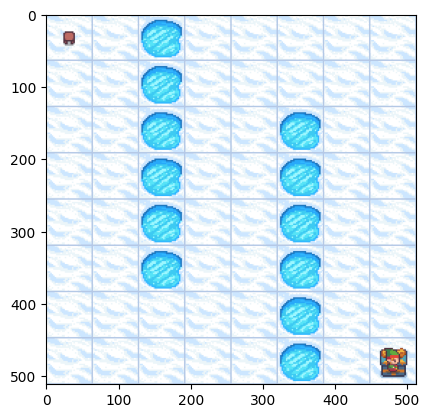

In [85]:
run_and_visualize_policy(env_slippery, optimized_pi)

In [90]:
print("How does the policy work even if it is slippery?")
print(V)

# 8x8 state-values:
# 0.23722284 0.23601814 0.         0.58972582 0.63268681 0.67122288 0.70155323 0.70517641 
# 0.24561611 0.24196551 0.         0.56463531 0.61332306 0.66123261 0.71918925 0.73016857
# 0.25670962 0.25159456 0.         0.50796721 0.5209     0.         0.74763955 0.76327421
# 0.26960376 0.26373264 0.         0.45375927 0.45719459 0.         0.78311095 0.80203839 
# 0.28364468 0.2779915  0.         0.40986628 0.41077887 0.         0.82338553 0.84527002
# 0.29789316 0.29502115 0.         0.37748089 0.3777236  0.         0.86672671 0.89276875 
# 0.30979224 0.31811884 0.3328701  0.35629161 0.3563572  0.         0.91029031 0.94586438 
# 0.31085329 0.32133413 0.33428683 0.34583346 0.3458551  0.         0.94586438 0.             

print("We can see that the values are getting higher the closer we get to the goal state G.")
print("This happens because only the goal is giving a reward of 1, all other states give 0 reward.")
print("If we are at the start there are more steps to reach the goal, so the discounted reward is lower.")
print("\nIf its slippery, there is a chance we will slip into a hole, we are trying to go up in the middle corridor. Lets take a look at the policy on such a state:")

print("\nRight = 2, Left = 0, Down = 1, Up = 3")
print(f"Action for a left tile in the middle corrider = {optimized_pi[4*8 +3]}") 
print(f"Action for a right tile in the middle corrider = {optimized_pi[4*8 +4]}")

print("We can see that the policy is trying to go right when on the left tile and left when on the right tile.")
print("It basically just makes sure it is not slipping into a hole and it is waiting until he is 'accidentally' slipping upward the corridor. Pretty smart!")
print("\nThis is the same as before = we get the same result with a faster algorithm!")

How does the policy work even if it is slippery?
[0.23722284 0.23601814 0.         0.58972582 0.63268681 0.67122288
 0.70155323 0.70517641 0.24561611 0.24196551 0.         0.56463531
 0.61332306 0.66123261 0.71918925 0.73016857 0.25670962 0.25159456
 0.         0.50796721 0.5209     0.         0.74763955 0.76327421
 0.26960376 0.26373264 0.         0.45375927 0.45719459 0.
 0.78311095 0.80203839 0.28364468 0.2779915  0.         0.40986628
 0.41077887 0.         0.82338553 0.84527002 0.29789316 0.29502115
 0.         0.37748089 0.3777236  0.         0.86672671 0.89276875
 0.30979224 0.31811884 0.3328701  0.35629161 0.3563572  0.
 0.91029031 0.94586438 0.31085329 0.32133413 0.33428683 0.34583346
 0.3458551  0.         0.94586438 0.        ]
We can see that the values are getting higher the closer we get to the goal state G.
This happens because only the goal is giving a reward of 1, all other states give 0 reward.
If we are at the start there are more steps to reach the goal, so the disc

In [91]:
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

n_envs = 10

for i in range(n_envs):
    random_env = gym.make('FrozenLake-v1', desc=generate_random_map(size=8), render_mode='rgb_array')
    e = FrozenLakeSystemDynamics(random_env)
    random_env.reset()

    optimized_pi, V = value_iteration(e, 0.99, 1e-10)
    print(f"Random env run with success-rate: {test_policy(random_env, optimized_pi)} %")

/tmp/ipykernel_207730/3010976928.py:30: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  self._map = np.chararray((len(desc), len(desc)))


Random env run with success-rate: 11.0 %
Random env run with success-rate: 21.6 %
Random env run with success-rate: 82.19999999999999 %
Random env run with success-rate: 0.2 %
Random env run with success-rate: 86.0 %
Random env run with success-rate: 28.000000000000004 %
Random env run with success-rate: 75.2 %
Random env run with success-rate: 25.6 %
Random env run with success-rate: 1.7999999999999998 %
Random env run with success-rate: 8.4 %


In [93]:
print("This is also the same as before = we get similar results with a faster algorithm!")
print("It still can not solve random environments with 100% success rate. There are envs that are just too hard to solve when slippery.")

This is also the same as before = we get similar results with a faster algorithm!
It still can not solve random environments with 100% success rate. There are envs that are just too hard to solve when slippery.
